<a href="https://colab.research.google.com/github/Haripriya-AIML/Image-denoising/blob/main/rad_hdr_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image shape: (512, 512, 1)


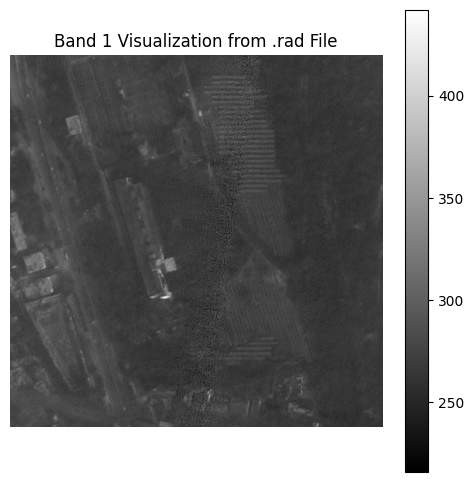

In [25]:
!pip install spectral
import spectral
import matplotlib.pyplot as plt

# Define the paths to your header and data files
hdr_path = '/content/band1_image1.rad.hdr'
# data_path = '/content/band1_image1.rad' # Assuming the data file has a .rad extension

# Open the image using spectral
# Provide the data file explicitly as the second positional argument
try:
    image = spectral.open_image(hdr_path) # Pass only the header path

    # View basic info
    print("Image shape:", image.shape)  # (lines, samples, bands)

    # Load it into a NumPy array (may be large, so you can read only one band if needed)
    img = image.load()  # full cube (3D)
    band_1 = img[:, :, 0]  # extract first band for visualization

    # Plot the first band
    plt.figure(figsize=(6, 6))
    plt.imshow(band_1, cmap='gray')
    plt.title("Band 1 Visualization from .rad File")
    plt.axis('off')
    plt.colorbar()
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find the header file at {hdr_path}. Please check the file path.")
except spectral.envi.EnviDataFileNotFoundError:
    print(f"Error: The spectral library could not find the data file corresponding to the header file at {hdr_path}. Please ensure the data file exists in the same directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

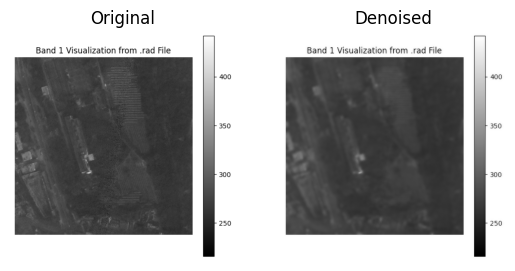

In [28]:
import cv2
import matplotlib.pyplot as plt

# Load the grayscale image
img_path = '/content/rad_hdr_1.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not load the image from {img_path}. Please check the file path and ensure the image exists.")
else:
    # Apply bilateral filter
    denoised = cv2.bilateralFilter(img, 9, 75, 75)

    # Display original and denoised images
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(denoised, cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    plt.show()